# CS50 AI with Python
##  Lecture 0

Frontier - contains all of the paths that could form segments of paths from a start node to a goal node. 

Goal State - the "solution" state

Initial State - the state we start with

#### Initial Approach


* Start with a frontier that contains the initial state
* From there repeat these steps:
  * First check if the frontier is empty
    * If it is then return No Solution
  * Take a node from the frontier and then:
    * If the node is the goal state return the solution.
    * If not:
      * Expand the node - To consider all the actions you can take. From that create all the possible nodes.

<img src="https://artint.info/2e/html2e/x227.png" alt="Frontier Search" width="300">

#### What could potentially be wrong?

When you can get back to a past state.

For example in the 15 puzzle, you can slide a tile right, but can also slide it left again. This makes a loop between A & B

#### How can we solve this problem?

* Start with a frontier that contains the initial state
* Start with an empty, explored set.
  
* From there repeat we repeat these steps:
  * First check if the frontier is empty
    * If it is then return No Solution
  * Add the node to the explore set
  * Take a node from the frontier and then:
    * If the node is the goal state return the solution.
    * If not:
    * Add the node to the explored set.
      * Expand the node - Expand the node and add the resulting nodes to the frontier. Except this time we will check if they are in the Frontier or in the explored set. 
      * If they are:
        * We don't add that node to the Frontier

#### How do we add and remove nodes to our data structure? 

##### Types of data structures we can use

* Stack
  * A very simple type of data structure. Last-in, first-out data type.
  * This type of data type goes very deep into the tree, and then checks another deep branch. Once it reaches a dead-end it backs-up and chooses a different action in the last it decision made.
  * It will always find a solution even if it is slow as long as the problem is finite.
  * We call this a depth-first search
    * This is a search algorithm that always expands to the deepest node in the frontier
  * Is this the most optimal solution?
    * No
* Queue
  * First in, first-out data type
  * It bounces back between all the possible paths, looking 
  * It will always find a solution even if it is slow as long as the problem is finite.
  * Breadth-First Search
    * It always explores the shallowest node in the frontier
  * Is this the most optimal solution?
    * No, because BFS had to explore many states
  
#### Putting BFS & DFS into code


In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\nirva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import sys
import PIL

class Node():
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action


class StackFrontier():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node


class QueueFrontier(StackFrontier):

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            return node


#### What does this code do?

The frontier starts empty in the class StackFrontier. There are certain functions to do certain things like add nodes to the frontier, checks if the frontier is empty, remove something from the frontier, check if something in the frontier is a specific state. QueueFrontier inherits from the StackFrontier and removes a node in a different way. Instead of removing from the end of the list(DFS), it removes from the beginning of the Stack(BFS).


In [8]:
class Maze():

    def __init__(self, filename):

        # Read file and set height and width of maze
        with open(filename) as f:
            contents = f.read()

        # Validate start and goal
        if contents.count("A") != 1:
            raise Exception("maze must have exactly one start point")
        if contents.count("B") != 1:
            raise Exception("maze must have exactly one goal")

        # Determine height and width of maze
        contents = contents.splitlines()
        self.height = len(contents)
        self.width = max(len(line) for line in contents)

        # Keep track of walls
        self.walls = []
        for i in range(self.height):
            row = []
            for j in range(self.width):
                try:
                    if contents[i][j] == "A":
                        self.start = (i, j)
                        row.append(False)
                    elif contents[i][j] == "B":
                        self.goal = (i, j)
                        row.append(False)
                    elif contents[i][j] == " ":
                        row.append(False)
                    else:
                        row.append(True)
                except IndexError:
                    row.append(False)
            self.walls.append(row)

        self.solution = None


    def print(self):
        solution = self.solution[1] if self.solution is not None else None
        print()
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):
                if col:
                    print("█", end="")
                elif (i, j) == self.start:
                    print("A", end="")
                elif (i, j) == self.goal:
                    print("B", end="")
                elif solution is not None and (i, j) in solution:
                    print("*", end="")
                else:
                    print(" ", end="")
            print()
        print()


    def neighbors(self, state):
        row, col = state
        candidates = [
            ("up", (row - 1, col)),
            ("down", (row + 1, col)),
            ("left", (row, col - 1)),
            ("right", (row, col + 1))
        ]

        result = []
        for action, (r, c) in candidates:
            if 0 <= r < self.height and 0 <= c < self.width and not self.walls[r][c]:
                result.append((action, (r, c)))
        return result


    def solve(self):
        """Finds a solution to maze, if one exists."""

        # Keep track of number of states explored
        self.num_explored = 0

        # Initialize frontier to just the starting position
        start = Node(state=self.start, parent=None, action=None)
        frontier = StackFrontier()
        frontier.add(start)

        # Initialize an empty explored set
        self.explored = set()

        # Keep looping until solution found
        while True:

            # If nothing left in frontier, then no path
            if frontier.empty():
                raise Exception("no solution")

            # Choose a node from the frontier
            node = frontier.remove()
            self.num_explored += 1

            # If node is the goal, then we have a solution
            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return

            # Mark node as explored
            self.explored.add(node.state)

            # Add neighbors to frontier
            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    frontier.add(child)


    def output_image(self, filename, show_solution=True, show_explored=False):
        from PIL import Image, ImageDraw
        cell_size = 50
        cell_border = 2

        # Create a blank canvas
        img = Image.new(
            "RGBA",
            (self.width * cell_size, self.height * cell_size),
            "black"
        )
        draw = ImageDraw.Draw(img)

        solution = self.solution[1] if self.solution is not None else None
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):

                # Walls
                if col:
                    fill = (40, 40, 40)

                # Start
                elif (i, j) == self.start:
                    fill = (255, 0, 0)

                # Goal
                elif (i, j) == self.goal:
                    fill = (0, 171, 28)

                # Solution
                elif solution is not None and show_solution and (i, j) in solution:
                    fill = (220, 235, 113)

                # Explored
                elif solution is not None and show_explored and (i, j) in self.explored:
                    fill = (212, 97, 85)

                # Empty cell
                else:
                    fill = (237, 240, 252)

                # Draw cell
                draw.rectangle(
                    ([(j * cell_size + cell_border, i * cell_size + cell_border),
                      ((j + 1) * cell_size - cell_border, (i + 1) * cell_size - cell_border)]),
                    fill=fill
                )

        img.save(filename)


if len(sys.argv) != 2:
    sys.exit("Usage: python maze.py maze.txt")

m = Maze(sys.argv[1])
print("Maze:")
m.print()
print("Solving...")
m.solve()
print("States Explored:", m.num_explored)
print("Solution:")
m.print()
m.output_image("maze.png", show_explored=True)

OSError: [Errno 22] Invalid argument: '--f=c:\\Users\\nirva\\AppData\\Roaming\\jupyter\\runtime\\kernel-v3e150d37b28959bfa80eecce72abbfc7c8e30ec51.json'

Solving the Maze (solve method)

Exploration Process:

* Initializes the frontier (stack) with the start position.
* Iterates until it finds the goal or exhausts all possibilities.
* If it reaches B, reconstructs the solution path.
* Uses a set to track explored states to avoid revisiting.
* Adds unvisited neighbors to the stack.


#### Running the Code
##### DFS code

In [21]:
%run mazeDFS.py maze2.txt

Maze:

███                 █████████
█   ███████████████████   █ █
█ ████                █ █ █ █
█ ███████████████████ █ █ █ █
█                     █ █ █ █
█████████████████████ █ █ █ █
█   ██                █ █ █ █
█ █ ██ ███ ██ █████████ █ █ █
█ █    █   ██B█         █ █ █
█ █ ██ ████████████████ █ █ █
███ ██             ████ █ █ █
███ ██████████████ ██ █ █ █ █
███             ██    █ █ █ █
██████ ████████ ███████ █ █ █
██████ ████             █   █
A      ██████████████████████

Solving...
States Explored: 194
Solution:

███                 █████████
█   ███████████████████   █ █
█ ████                █ █ █ █
█ ███████████████████ █ █ █ █
█                     █ █ █ █
█████████████████████ █ █ █ █
█   ██********        █ █ █ █
█ █ ██*███ ██*█████████ █ █ █
█ █****█   ██B█         █ █ █
█ █*██ ████████████████ █ █ █
███*██             ████ █ █ █
███*██████████████ ██ █ █ █ █
███****         ██    █ █ █ █
██████*████████ ███████ █ █ █
██████*████             █   █
A******████████████

#### How does BFS compare?


In [20]:
%run mazeBFS.py maze2.txt

Maze:

███                 █████████
█   ███████████████████   █ █
█ ████                █ █ █ █
█ ███████████████████ █ █ █ █
█                     █ █ █ █
█████████████████████ █ █ █ █
█   ██                █ █ █ █
█ █ ██ ███ ██ █████████ █ █ █
█ █    █   ██B█         █ █ █
█ █ ██ ████████████████ █ █ █
███ ██             ████ █ █ █
███ ██████████████ ██ █ █ █ █
███             ██    █ █ █ █
██████ ████████ ███████ █ █ █
██████ ████             █   █
A      ██████████████████████

Solving...
States Explored: 77
Solution:

███                 █████████
█   ███████████████████   █ █
█ ████                █ █ █ █
█ ███████████████████ █ █ █ █
█                     █ █ █ █
█████████████████████ █ █ █ █
█   ██********        █ █ █ █
█ █ ██*███ ██*█████████ █ █ █
█ █****█   ██B█         █ █ █
█ █*██ ████████████████ █ █ █
███*██             ████ █ █ █
███*██████████████ ██ █ █ █ █
███****         ██    █ █ █ █
██████*████████ ███████ █ █ █
██████*████             █   █
A******█████████████

#### BFS did much better

While DFS looked through 194 states, BFS almost halved that by solving the puzzle in a mere 77 moves.

#### Is BFS the best we can do?

Well, no, because if B is much farther, BFS would have searched the whole maze.

##### How do we make our Search smarter?

We have to make the way our agent searches in a way a human searches. A human might observe a fork and visually see where B is, and choose the path that takes them closer to B. We can implement this if we know the coordinate pair of the agent and the coordinate pair of the goal state.

### Uninformed Search vs Informed Search

#### Uniformed Search

* A search strategy that uses no problem-specific knowledge.
* BFS & DFS
  
#### Informed Search

* A search strategy that uses problem-specific knowledge to find solutions more efficiently. 
* ##### Greedy Best-First Search
  * GBFS
  * A search strategy that expands the node that is closest to the goal, as estimated by a heuristic function h(n).

#### What does heuristic function look like?

When confronted with a fork, it chooses the direction that is geographically, ignoring the walls, is better. This called the Manhattan distance. The heuristic function essentially gives each square a number(a Manhattan distance) and always chooses the square with less of that number.

The problem with this method is that picking the better decision locally might not be the best solution in the bigger picture.

#### A* search
* Search algorithm that expands node with lowest value of g(n) + h(n). Where g(n) & h(n) are:
  * g(n) = cost to reach node
  * h(n) = estimated cost to goal
* Combines the cost to the node and the heuristic function to make a decision.

#### What does A* search look like?

Once the A* search realizes it chose a path that take more states to get to the goal state, it back tracks and chooses the better state. It realizes it's mistake by adding the number of steps it took to get to it's current position plus it's distance from the state.

#### A* search
##### Is optimal if
* ###### h(n) is admissible(never overestimates the true cost)
* ###### h(n) is consistent (for every node n and successor n' with step cost c, h(n) < h(n') + C; It means that the heuristic value in the current state should never be more than the heuristic value of it's successor to it's successor + the cost to make that action)

A-Star is known for its high memory usage.

### More than 1 agent

So far there have only been algorithms where there has been only 1 agent solving the search problem. 

#### Adversarial Search

Sometimes in search problems there is someone competing against the agent. The most popular example of this is tic-tac-toe.

There are algorithms to use in these adversarial search situations.

#### MiniMax

Since computers do not understand the concept of winning or losing, we have to convert these concepts into numbers.

-1       0       1
Lose    Draw    Win

We have two players; the X player, and the O player. We will assign X as the max player and O as the min player. 

This is because in minimax:
* Max(X) aims to maximize the score
* Min(O) aims to minimize the score

This useful in these situations is because X will always want to maximize the score. This means if winning is not possible then it would rather draw than to lose.

### Game
 * S0: Initial state
 * Player(s): returns which player to move in state, s
 * Actions(s): returns legal moves in the current state, s
 * Result(s, a): returns state after action a taken in state, s
 * Terminal(s): checks if state, s is a terminal state(when the game ends)
 * Utility(s): final numerical value for terminal state s

* Given a state s:
  * MAX picks action a in ACTIONS(s) that produces highest value of MIN-VALUE(RESULT(s, a))
  * MIN picks action a in ACTIONS(s) that produces smallest value of MAX-VALUE(RESULT(s, a))
  
function MAX-VALUE(state):
* Check ```if TERMINAL(state):```(if the game is over):
  * return Utility(state)
* ```else:```
  * ```v = -infinity```
  * ```for action in Actions(state):``` Checks all the possible actions that the player can take
    * ```v = MAX(v, MIN-VALUE(RESULT(state, action)))``` V is going to be the maximum of v and MIN-VALUE(RESULT(state, action)). MIN-VALUE(RESULT(state, action)) takes the minimum value of what player O can do. The lower the number, the worse for player X it is going to be. 
    * These lines are going through all the actions and asking how they can maximize the score based on what O is going to do next. 
    * ```return v```
    * V represents the worst possible value for X that can come out of the best action for X.

function MIN-VALUE(state):
* Check ```if TERMINAL(state):```(if the game is over):
  * return Utility(state)
* ```else:```
  * ```v = infinity```
  * ```for action in Actions(state):``` Checks all the possible actions that the player can take
    * ```v = MIN(v, MAX-VALUE(RESULT(state, action)))``` V is going to be the minimum of v and MAX-VALUE(RESULT(state, action)). MAX-VALUE(RESULT(state, action)) takes the maximum value of what player X can do. The higher the number, the worse for player O it is going to be. 
    * These lines are going through all the actions and asking how they can maximize the score based on what X is going to do next. 
    * ```return v```
    * V represents the worst possible value for O that can come out of the best action for O.

That is how we figure out the optimal action in a game. 

#### Optimizations

It takes a decent amount of computation. To fix this, we do not have to calculate all of the possible states. If our current best action/state is more than a state under a proposed action, we can rule out that action and not calculate the rest of the possible states. This can be shown in the picture below.
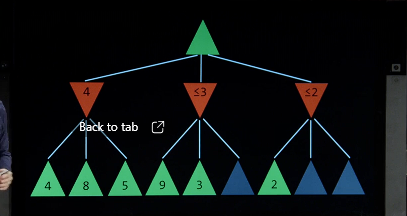

#### Alpha-Beta Pruning

The example above is called Alpha-Beta Pruning. Even then there will be a lot of computation when games get more complex. Tic-Tac-Toe is a simple game. Even though tic-tac-toe is classified as "simple" there are 255, 168 possible Tic-Tac-Toe games. Compared to a chess game which has a total possible game number of 10 to 29000th power, tic-tac-toe is like a pea compared to the earth. This is a problem for the minimax algorithm. A better approach is...

#### Depth-Limited Minimax

This version of minimax limits itself to 10 or 12 moves deep, for example. To evaluate the position of the game and how it affects the player after 10 or 12 moves later, an evaluation function has to be implemented. 

Evaluation Function
* Function that estimates the expected utility of the game from a given state

